In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_excel('../../dataset/Concrete_Data.xls')

In [3]:
raw_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
raw_data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [5]:
raw_data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
raw_data.shape

(1030, 9)

In [7]:
df = raw_data.copy()

In [8]:
df['Age (day)'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age (day), dtype: int64

In [9]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [10]:
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplastic',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarseagg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fineagg',
    'Age (day)': 'age',
    'Concrete compressive strength(MPa, megapascals) ': 'strength'
})

In [11]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


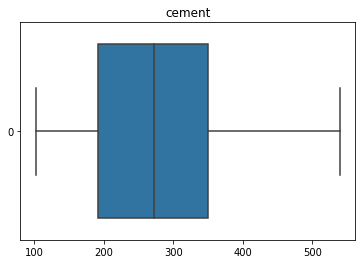

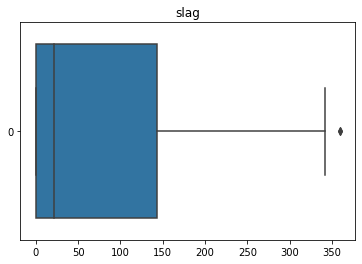

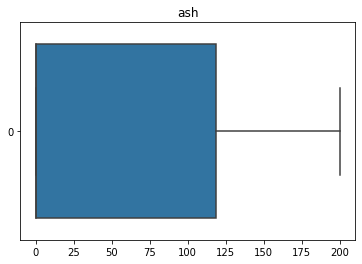

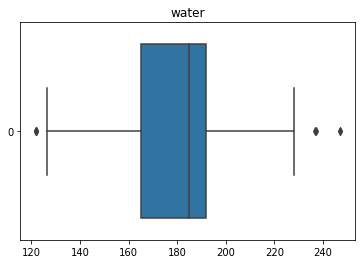

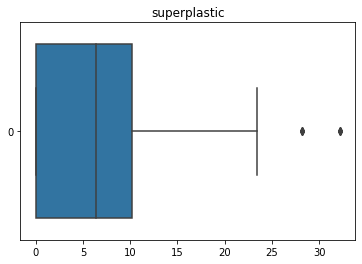

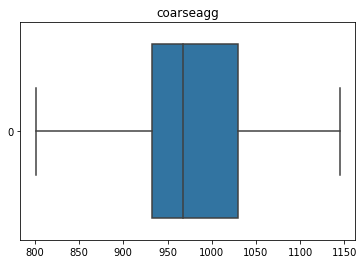

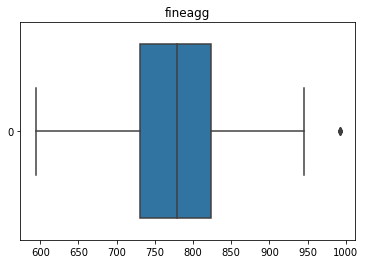

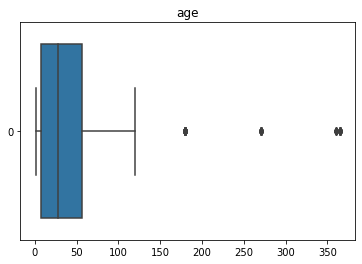

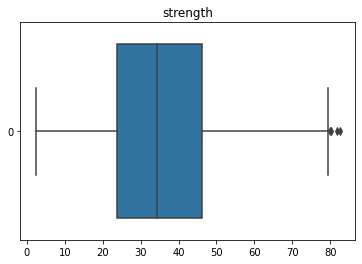

In [13]:
for x in df.describe():
    sns.boxplot(df[x], orient='h')
    plt.title(df[x].name)
    plt.show()

In [14]:
from scipy import stats

slag_Q1 = df['slag'].quantile(q=0.25)
slag_Q3 = df['slag'].quantile(q=0.75)
print('Quantile(Q1) is', slag_Q1)
print('Quantile(Q3) is', slag_Q3)
print('Interquartile range(IQR) is', stats.iqr(df['slag']))

Quantile(Q1) is 0.0
Quantile(Q3) is 142.95
Interquartile range(IQR) is 142.95


In [15]:
slag_LOutliers = slag_Q1 - 1.5 * (slag_Q3 - slag_Q1)
slag_UOutliers = slag_Q3 + 1.5 * (slag_Q3 - slag_Q1)
print('Lower outliers', slag_LOutliers)
print('Upper outliers', slag_UOutliers)

Lower outliers -214.42499999999998
Upper outliers 357.375


In [16]:
print('Number of lower outliers in slag', df[df['slag'] < -214.43]['slag'].count())
print('Number of upper outliers in slag', df[df['slag'] > 357.38]['slag'].count())

Number of lower outliers in slag 0
Number of upper outliers in slag 2


In [17]:
water_Q1 = df['water'].quantile(0.25)
water_Q3 = df['water'].quantile(0.75)

print('Quantile(Q1) is', water_Q1)
print('Quantile(Q3) is', water_Q3)
print('Interquartile range(IQR) is', stats.iqr(df['water']))

Quantile(Q1) is 164.9
Quantile(Q3) is 192.0
Interquartile range(IQR) is 27.099999999999994


In [18]:
water_LOutliers = water_Q1 - 1.5 * (water_Q3 - water_Q1)
water_UOutliers = water_Q3 + 1.5 * (water_Q3 - water_Q1)

print('Lower outliers', water_LOutliers)
print('Upper outliers', water_UOutliers)

Lower outliers 124.25000000000001
Upper outliers 232.64999999999998


In [19]:
print('Number of lower outliers in water', df[df['water'] < 124.25]['water'].count())
print('Number of upper outliers in water', df[df['water'] > 232.65]['water'].count())

Number of lower outliers in water 5
Number of upper outliers in water 4


In [20]:
superplastic_Q1 = df['superplastic'].quantile(0.25)
superplastic_Q3 = df['superplastic'].quantile(0.75)

print('Quantile(Q1) is', superplastic_Q1)
print('Quantile(Q3) is', superplastic_Q3)
print('Interquartile range(IQR) is', stats.iqr(df['superplastic']))

Quantile(Q1) is 0.0
Quantile(Q3) is 10.16
Interquartile range(IQR) is 10.16


In [21]:
superplastic_LOutliers = superplastic_Q1 - 1.5 * (superplastic_Q3 - superplastic_Q1)
superplastic_UOutliers = superplastic_Q3 + 1.5 * (superplastic_Q3 - superplastic_Q1)

print('Lower outliers', superplastic_LOutliers)
print('Upper outliers', superplastic_UOutliers)

Lower outliers -15.24
Upper outliers 25.4


In [22]:
print('Number of lower outliers in superplastic', df[df['superplastic'] < -15.24]['superplastic'].count())
print('Number of upper outliers in superplastic', df[df['superplastic'] > 25.4]['superplastic'].count())

Number of lower outliers in superplastic 0
Number of upper outliers in superplastic 10


In [23]:
fineagg_Q1 = df['fineagg'].quantile(0.25)
fineagg_Q3 = df['fineagg'].quantile(0.75)

print('Quantile(Q1) is', fineagg_Q1)
print('Quantile(Q3) is', fineagg_Q3)
print('Interquartile range(IQR) is', stats.iqr(df['fineagg']))

Quantile(Q1) is 730.95
Quantile(Q3) is 824.0
Interquartile range(IQR) is 93.04999999999995


In [24]:
fineagg_LOutliers = fineagg_Q1 - 1.5 * (fineagg_Q3 - fineagg_Q1)
fineagg_UOutliers = fineagg_Q3 + 1.5 * (fineagg_Q3 - fineagg_Q1)

print('Lower outliers', fineagg_LOutliers)
print('Upper outliers', fineagg_UOutliers)

Lower outliers 591.3750000000001
Upper outliers 963.5749999999999


In [25]:
print('Number of lower outliers in fineagg', df[df['fineagg'] < 591.38]['fineagg'].count())
print('Number of upper outliers in fineagg', df[df['fineagg'] > 963.57]['fineagg'].count())

Number of lower outliers in fineagg 0
Number of upper outliers in fineagg 5


In [26]:
age_Q1 = df['age'].quantile(q=0.25)
age_Q3 = df['age'].quantile(q=0.75)

print('Quantile(Q1) is', age_Q1)
print('Quantile(Q3) is', age_Q3)
print('Interquartile range(IQR) is', stats.iqr(df['age']))

Quantile(Q1) is 7.0
Quantile(Q3) is 56.0
Interquartile range(IQR) is 49.0


In [27]:
age_LOutliers = age_Q1 - 1.5 * (age_Q3 - age_Q1)
age_UOutliers = age_Q3 + 1.5 * (age_Q3 - age_Q1)

print('Lower outliers', age_LOutliers)
print('Upper outliers', age_UOutliers)

Lower outliers -66.5
Upper outliers 129.5


In [28]:
print('Number of lower outliers in water', df[df['age'] < -66.5]['age'].count())
print('Number of upper outliers in water', df[df['age'] > 129.5]['age'].count())

Number of lower outliers in water 0
Number of upper outliers in water 59


In [29]:
strength_Q1 = df['strength'].quantile(0.25)
strength_Q3 = df['strength'].quantile(0.75)

print('Quantile(Q1) is',strength_Q1)
print('Quantile(Q3) is', strength_Q3)
print('Interquartile range(IQR) is', stats.iqr(df['strength']))

Quantile(Q1) is 23.707115153
Quantile(Q3) is 46.13628654
Interquartile range(IQR) is 22.429171387


In [30]:
strength_LOutliers = strength_Q1 - 1.5 * (strength_Q3 - strength_Q1)
strength_UOutliers = strength_Q3 + 1.5 * (strength_Q3 - strength_Q1)

print('Lower outliers', strength_LOutliers)
print('Upper outliers', strength_UOutliers)

Lower outliers -9.936641927500002
Upper outliers 79.78004362050001


In [31]:
print('Number of lower outliers in strength', df[df['strength'] < -9.94]['strength'].count())
print('Number of upper outliers in strength', df[df['strength'] > 79.78]['strength'].count())

Number of lower outliers in strength 0
Number of upper outliers in strength 4


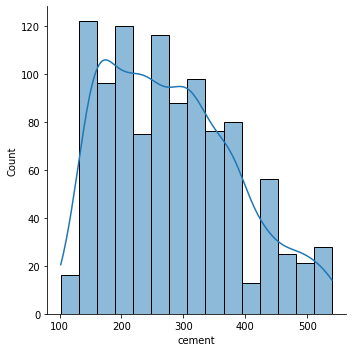

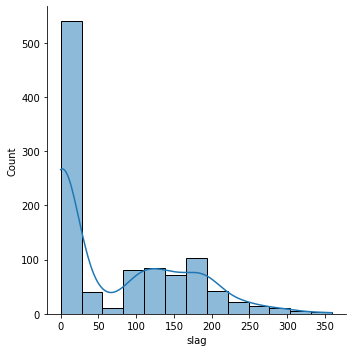

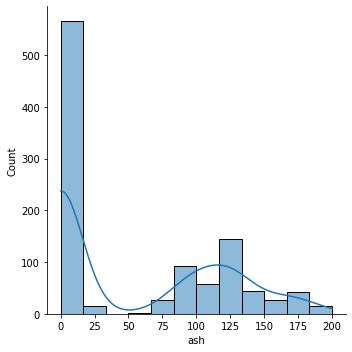

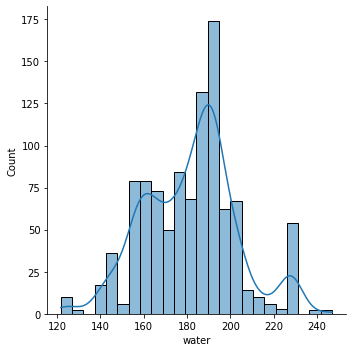

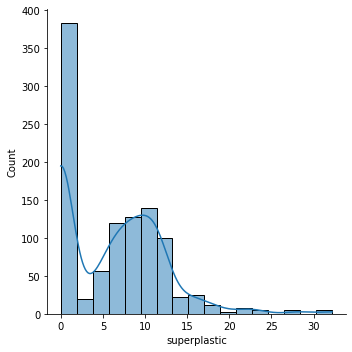

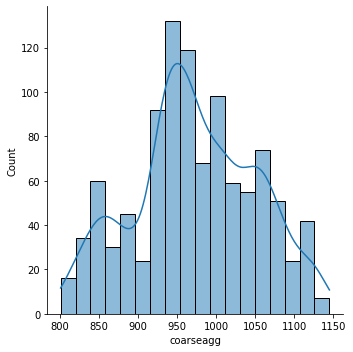

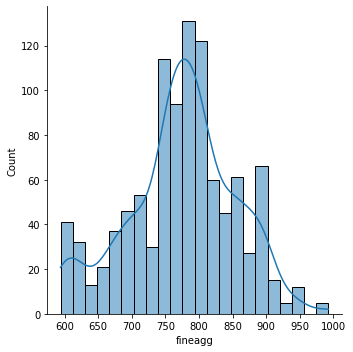

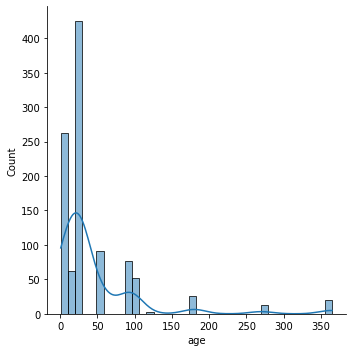

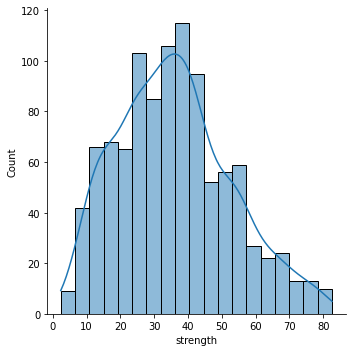

In [32]:
for x in df.describe():
    sns.displot(df[x], kde=True)
    plt.show()

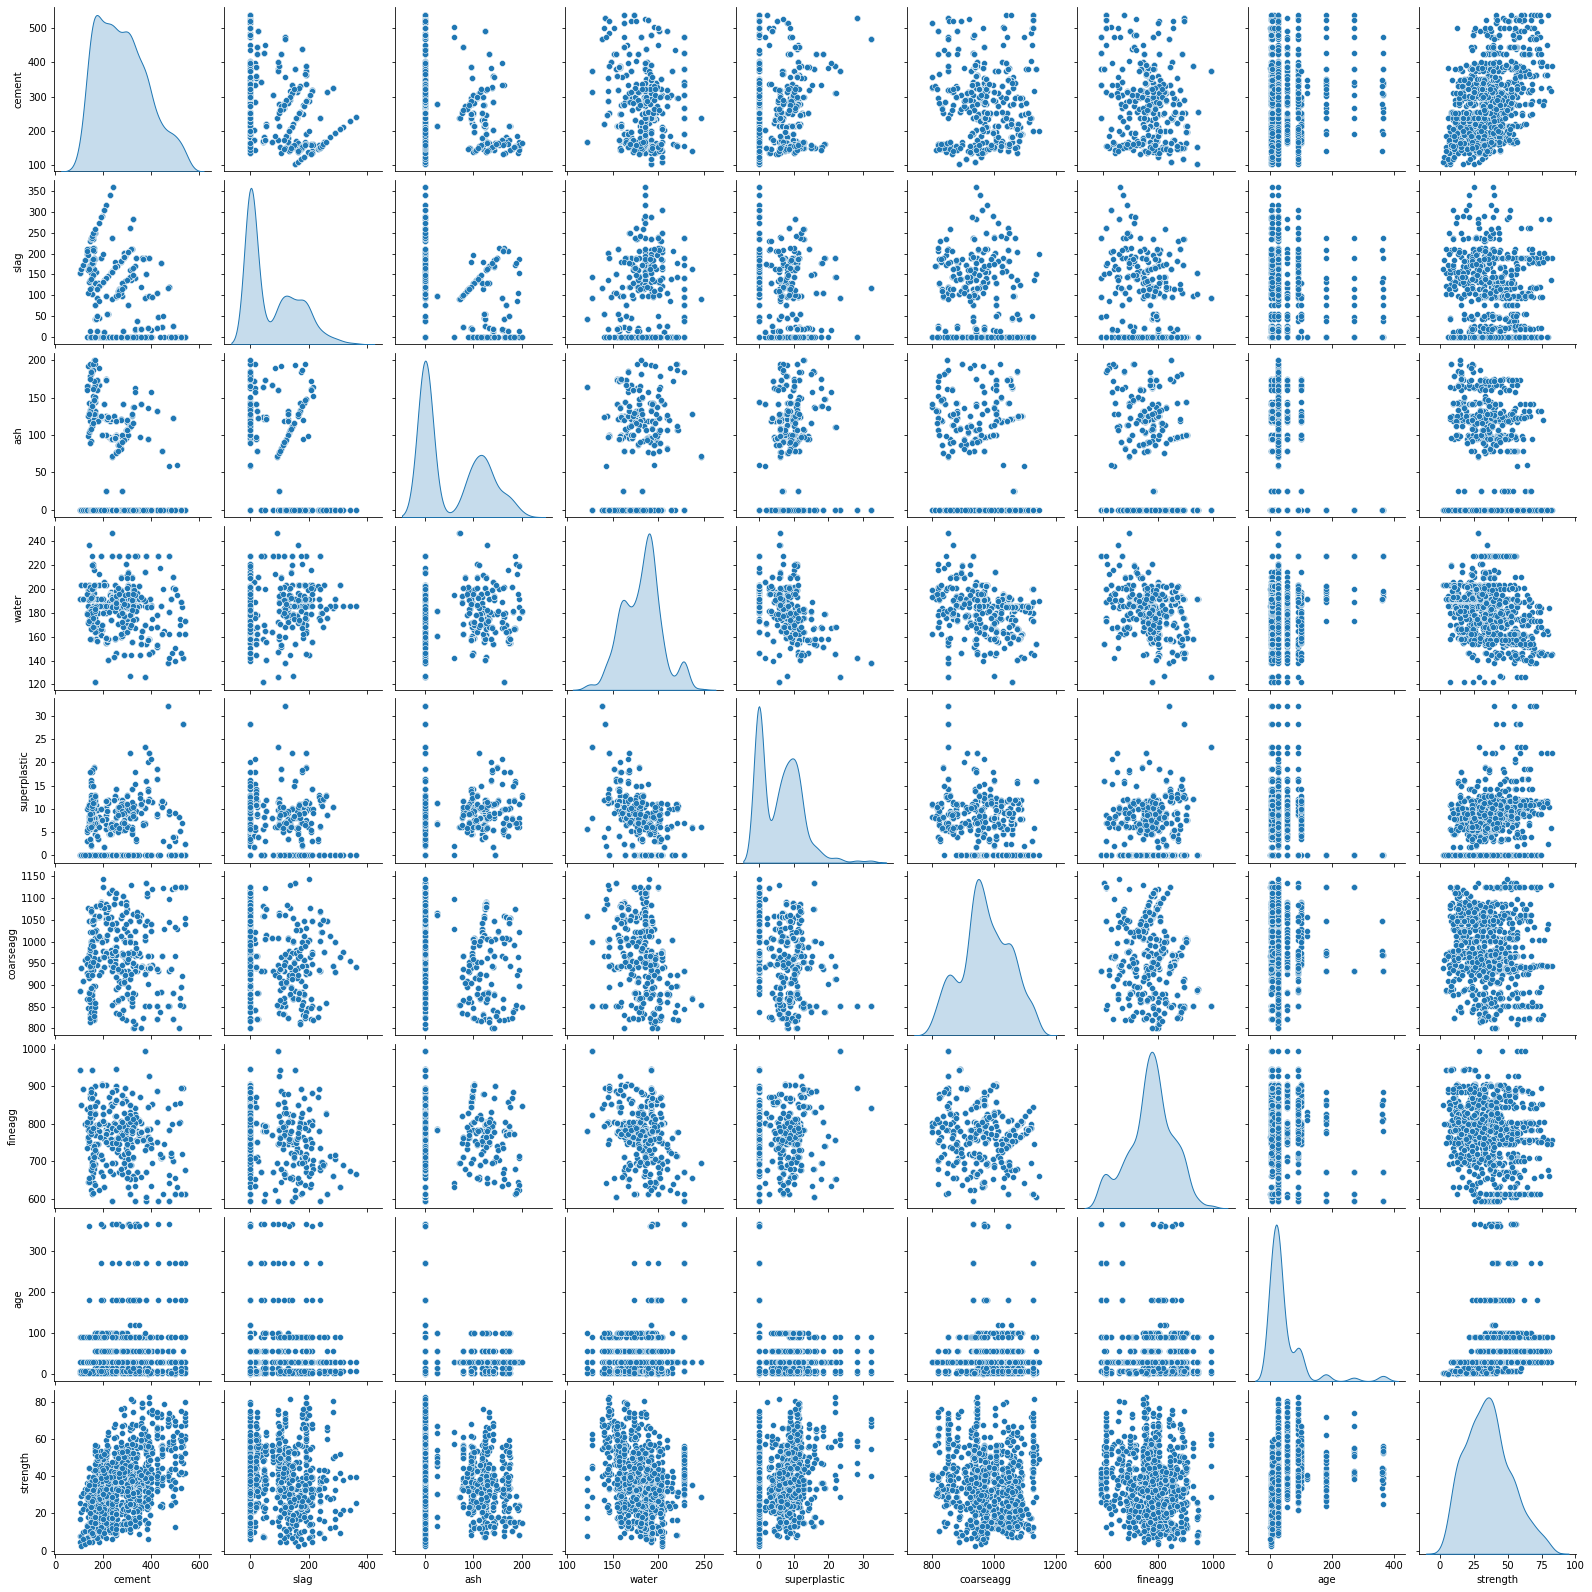

In [33]:
sns.pairplot(df, diag_kind='kde')
plt.show()

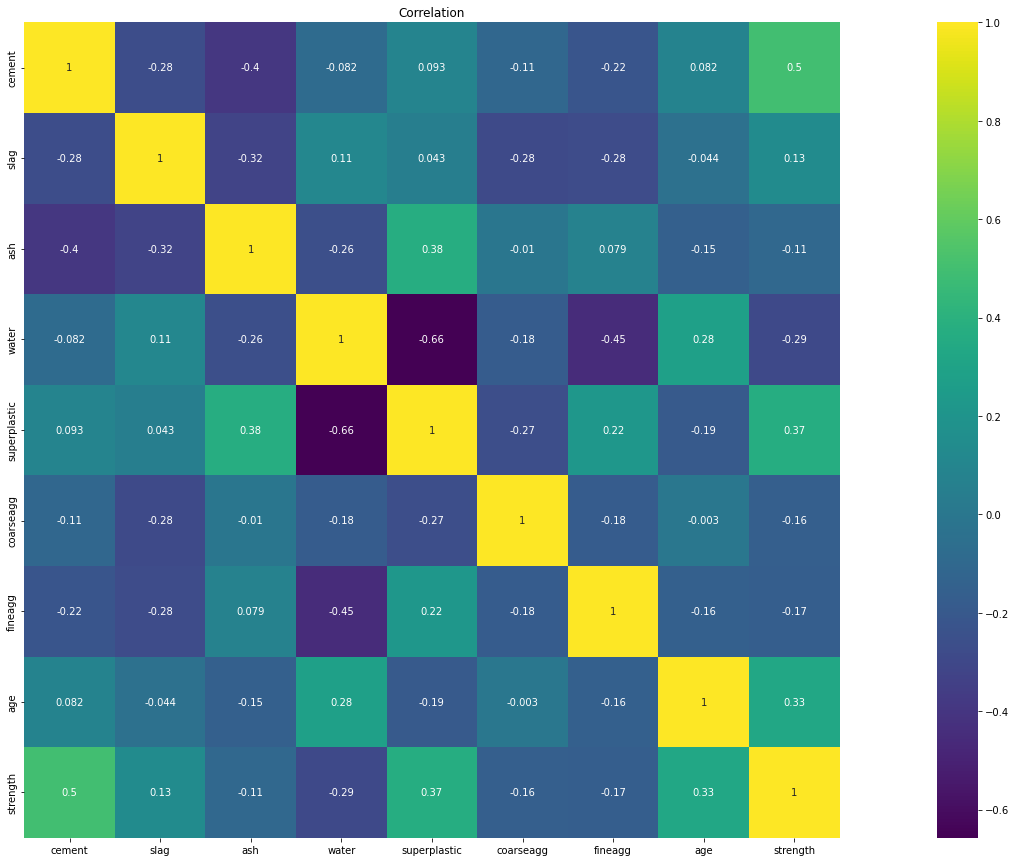

In [34]:
plt.figure(figsize=(35, 15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

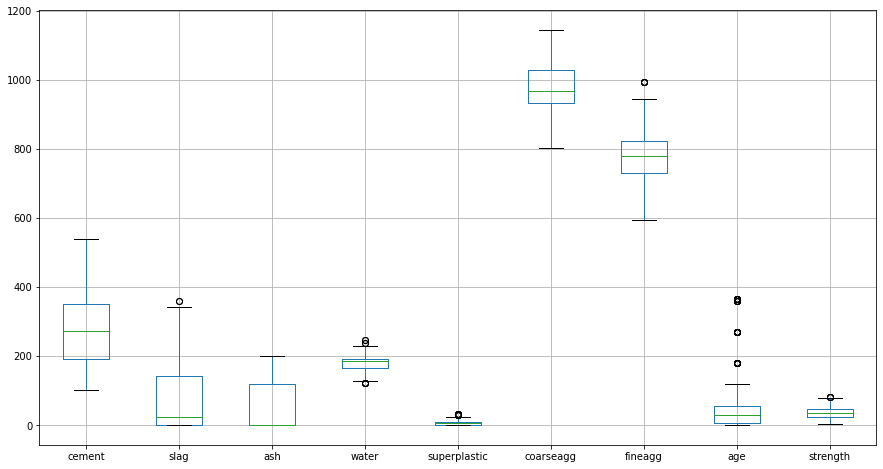

In [35]:
df.boxplot(figsize=(15, 8))
plt.show()

In [36]:
for cols in df.columns:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    
    low = Q1 - 1.5 * (Q3 - Q1)
    high = Q3 + 1.5 * (Q3 - Q1)
    df.loc[(df[cols] < low) | (df[cols]> high), cols] = df[cols].median()

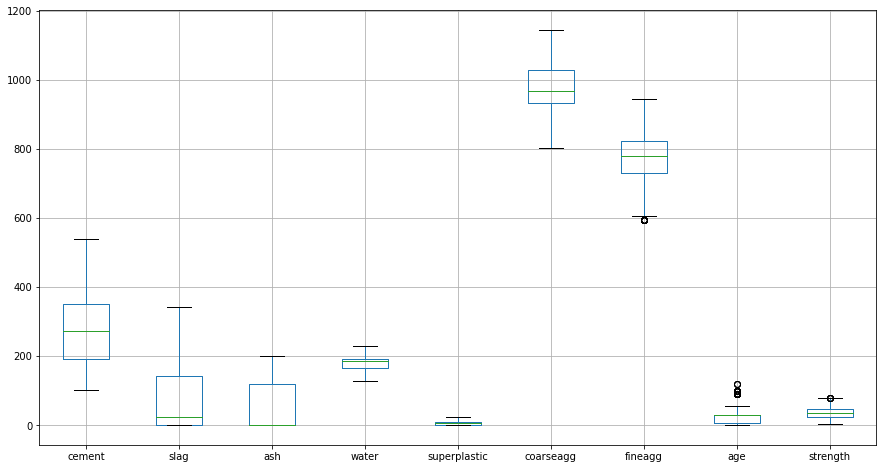

In [37]:
df.boxplot(figsize=(15, 8))
plt.show()

In [38]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,34.442774
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.296075


In [39]:
X = df.drop('strength', axis=1)
y = df['strength']

In [40]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

In [41]:
scaled_X.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,1.379695e-17,2.759389e-17,6.622534e-16,8.278168e-17,2.276496e-16,-8.519614e-16,-9.657862e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-8.581909e-01,-8.471320e-01,-2.673240e+00,-1.090890e+00,-2.212137e+00,-2.269697e+00,-1.124724e+00
25%,-8.500258e-01,-8.581909e-01,-8.471320e-01,-8.134656e-01,-1.090890e+00,-5.265140e-01,-5.287582e-01,-9.088206e-01
50%,-7.912996e-02,-6.004067e-01,-8.471320e-01,1.625517e-01,6.913411e-02,-6.328926e-02,8.733977e-02,-1.531587e-01
75%,6.589771e-01,8.141838e-01,1.001836e+00,5.024582e-01,7.496208e-01,7.267662e-01,6.312323e-01,-1.531587e-01
max,2.477918e+00,3.150353e+00,2.281122e+00,2.250549e+00,3.183845e+00,2.214232e+00,2.192293e+00,3.157360e+00


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=4)

In [43]:
from sklearn.ensemble import RandomForestRegressor

model_rforest = RandomForestRegressor()
model_rforest.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
print(model_rforest.score(X_train, y_train))
print(model_rforest.score(X_test, y_test))

0.9777005688343594
0.9059942017451006


In [45]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model_rforest.predict(X_test)
acc_r = r2_score(y_test, y_pred)
acc_r

0.9059942017451006

In [46]:
mean_squared_error(y_test, y_pred)

26.573889211248716

In [47]:
result = pd.DataFrame(columns=['accuracy'])
result.loc['Random Forest Regressor'] = acc_r
result

,accuracy
Random Forest Regressor,0.905994


In [48]:
from sklearn.model_selection import KFold, cross_val_score

k = 20
kfold = KFold(n_splits=k, random_state=74, shuffle=True)
k_result = cross_val_score(model_rforest, scaled_X, y, cv=kfold)
acc_rf = np.mean(abs(k_result))
acc_rf

0.891070596528739

In [49]:
for train_index, test_index in kfold.split(scaled_X):
    X_train, X_test = scaled_X.values[train_index], scaled_X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [50]:
model_rforest_kfold = RandomForestRegressor()
model_rforest_kfold.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
print(model_rforest_kfold.score(X_train, y_train))
print(model_rforest_kfold.score(X_test, y_test))

0.9805848523742181
0.9007404080255172


In [52]:
y_pred = model_rforest_kfold.predict(X_test)
acc_rf_kf = r2_score(y_test, y_pred)
acc_rf_kf

0.9007404080255172

In [53]:
mean_squared_error(y_test, y_pred)

22.83061930036354

In [54]:
result.loc['Random Forest Regressor(KFold)'] = acc_rf_kf

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [56]:
print(model_gbr.score(X_train, y_train))
print(model_gbr.score(X_test, y_test))

0.9301908615402196
0.8923415041611646


In [57]:
y_pred = model_gbr.predict(X_test)
acc_gbr = r2_score(y_test, y_pred)
acc_gbr

0.8923415041611646

In [58]:
mean_squared_error(y_test, y_pred)

24.76244445552517

In [59]:
result.loc['Gradient Boost Regressor'] = acc_gbr

In [60]:
k = 20
kfold = KFold(n_splits=k, random_state=74, shuffle=True)
k_result = cross_val_score(model_gbr, scaled_X, y, cv=kfold)
acc_gbr_k = np.mean(abs(k_result))
acc_gbr_k

0.8761088643609225

In [61]:
for train_index, test_index in kfold.split(scaled_X):
    X_train, X_test = scaled_X.values[train_index], scaled_X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [62]:
model_gbr_kfold = GradientBoostingRegressor()
model_gbr_kfold.fit(X_train, y_train)

GradientBoostingRegressor()

In [63]:
print(model_gbr_kfold.score(X_train, y_train))
print(model_gbr_kfold.score(X_test, y_test))

0.9301908615402196
0.8923415041611646


In [64]:
y_pred = model_gbr_kfold.predict(X_test)
acc_gbr_kf = r2_score(y_test, y_pred)
acc_gbr_kf

0.8923415041611646

In [65]:
result.loc['Gradient Boost Regressor(KFold)'] = acc_gbr_kf

In [66]:
result

,accuracy
Random Forest Regressor,0.905994
Random Forest Regressor(KFold),0.900740
Gradient Boost Regressor,0.892342
Gradient Boost Regressor(KFold),0.892342


In [67]:
from sklearn.neighbors import KNeighborsRegressor

scores = []

for i in range(1, 49):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    scores.append(np.mean(pred != y_test))

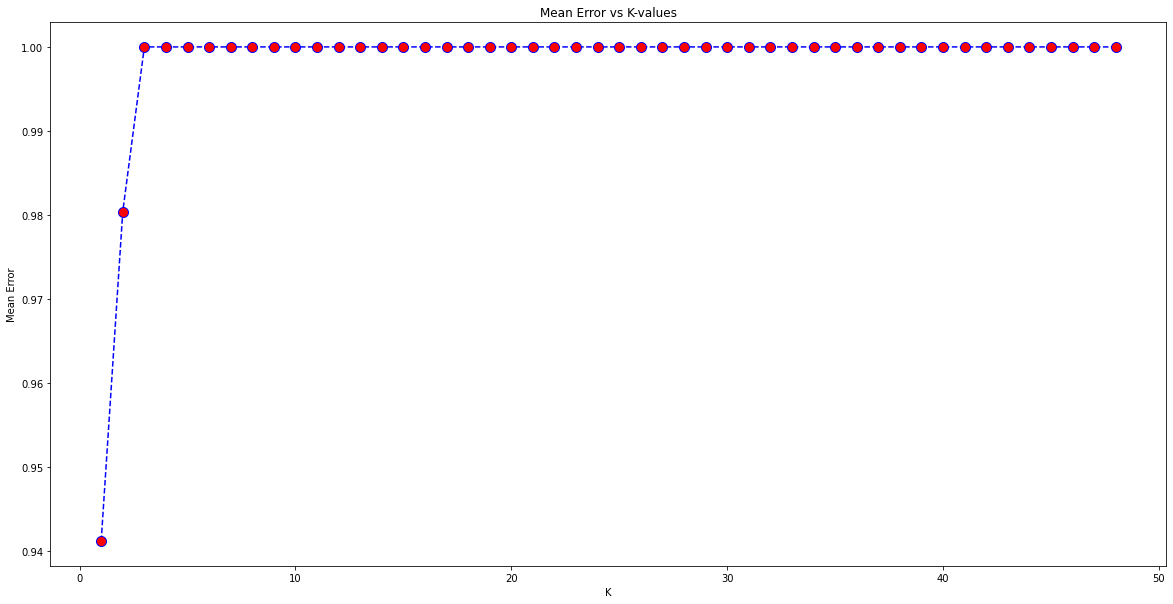

In [68]:
plt.figure(figsize=(20, 10))

plt.plot(range(1, 49), scores, c='b', ls='--', marker='o', mfc='red', ms=10)
plt.title('Mean Error vs K-values')
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.show()

In [69]:
model_knn = KNeighborsRegressor(1)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [70]:
print(model_knn.score(X_train, y_train))
print(model_knn.score(X_test, y_test))

0.9875953174829419
0.7400623389626202


In [71]:
pred = model_knn.predict(X_test)
acc_knn = r2_score(y_test, pred)
acc_knn

0.7400623389626202

In [72]:
result.loc['KNeighborsRegressor'] = acc_knn

In [73]:
from sklearn.ensemble import BaggingRegressor

model_br = BaggingRegressor()
model_br.fit(X_train, y_train)

BaggingRegressor()

In [74]:
print(model_br.score(X_train, y_train))
print(model_br.score(X_test, y_test))

0.9732191167363904
0.8726753468352689


In [75]:
pred = model_knn.predict(X_test)
acc_br = r2_score(y_test, pred)
acc_br

0.7400623389626202

In [76]:
mean_squared_error(y_test, pred)

59.78805335505495

In [77]:
result.loc['BaggingRegressor'] = acc_br

In [78]:
kfold = KFold(n_splits=40)
acc = cross_val_score(model_br, scaled_X, y, cv=kfold)
accuracy = np.mean(abs(acc))
accuracy

0.7456894410553749

In [79]:
for train_index, test_index in kfold.split(scaled_X):
    X_train, X_test = scaled_X.values[train_index], scaled_X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [80]:
model_br_kf = BaggingRegressor()
model_br_kf.fit(X_train, y_train)

BaggingRegressor()

In [81]:
print(model_br_kf.score(X_train, y_train))
print(model_br_kf.score(X_test, y_test))

0.9731502551699652
0.8997653029216612


In [82]:
pred = model_br_kf.predict(X_test)
acc_br = r2_score(y_test, pred)
acc_br

0.8997653029216612

In [83]:
mean_squared_error(y_test, pred)

8.761137724397694

In [84]:
result.loc['BaggingRegressor(KFold)'] = acc_br

In [85]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [86]:
print(model_svr.score(X_train, y_train))
print(model_svr.score(X_test, y_test))

0.7503691146854992
0.7198958591911855


In [87]:
pred = model_svr.predict(X_test)
acc_svr = r2_score(y_test, pred)
acc_svr

0.7198958591911855

In [88]:
mean_squared_error(y_test, pred)

24.48284901666489

In [89]:
result.loc['SVR'] = acc_svr

In [90]:
kfold = KFold(n_splits=20)
acc = cross_val_score(model_svr, scaled_X, y, cv=kfold)
accuracy = np.mean(abs(acc))
accuracy

0.5610234376925111

In [91]:
for train_index, test_index in kfold.split(scaled_X):
    X_train, X_test = scaled_X.values[train_index], scaled_X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [92]:
model_svr_kf = SVR()
model_svr_kf.fit(X_train, y_train)

SVR()

In [93]:
print(model_svr_kf.score(X_train, y_train))
print(model_svr_kf.score(X_test, y_test))

0.7516528384968998
0.5941905713293404


In [94]:
pred_svr_kf = model_svr_kf.predict(X_test)
acc_svr_kf = r2_score(y_test, pred_svr_kf)
acc_svr_kf

0.5941905713293404

In [95]:
mean_squared_error(y_test, pred_svr_kf)

60.888194118771345

In [96]:
result.loc['SVR(KFold)'] = acc_svr_kf

In [97]:
result

,accuracy
Random Forest Regressor,0.905994
Random Forest Regressor(KFold),0.900740
Gradient Boost Regressor,0.892342
Gradient Boost Regressor(KFold),0.892342
KNeighborsRegressor,0.740062
BaggingRegressor,0.740062
BaggingRegressor(KFold),0.899765
SVR,0.719896
SVR(KFold),0.594191


In [98]:
from xgboost.sklearn import XGBRegressor

model_xgr = XGBRegressor()
model_xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [99]:
print(model_xgr.score(X_train, y_train))
print(model_xgr.score(X_test, y_test))

0.9916116321729441
0.9780683430871021


In [100]:
pred_xgr = model_xgr.predict(X_test)
acc_xgr = r2_score(y_test, pred_xgr)
acc_xgr

0.9780683430871021

In [101]:
mean_squared_error(y_test, pred_xgr)

3.2906553892382986

In [102]:
result.loc['XGBRegressor'] = acc_xgr

In [103]:
kfold = KFold(n_splits=60)
acc = cross_val_score(model_xgr, scaled_X, y, cv=kfold)
accuracy = np.mean(abs(acc))
accuracy

0.8220682846655413

In [104]:
for train_index, test_index in kfold.split(scaled_X):
    X_train, X_test = scaled_X.values[train_index], scaled_X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [105]:
model_xgr_kf = XGBRegressor()
model_xgr_kf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [106]:
print(model_xgr_kf.score(X_train, y_train))
print(model_xgr_kf.score(X_test, y_test))

0.9916263721471043
0.9606574175991281


In [107]:
pred_xgr_kf = model_xgr_kf.predict(X_test)
acc_xgr_kf = r2_score(y_test, pred_xgr_kf)
acc_xgr_kf

0.9606574175991281

In [108]:
result.loc['XGBRegressor(KFold)'] = acc_xgr_kf

In [109]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [110]:
print(model_dtr.score(X_train, y_train))
print(model_dtr.score(X_test, y_test))

0.9929606357528491
0.9982476025733061


In [111]:
pd.DataFrame(model_dtr.feature_importances_, columns=['Feature Importance'], index=X.columns)

,Feature Importance
cement,0.368434
slag,0.098269
ash,0.014637
water,0.126794
superplastic,0.024180
coarseagg,0.025600
fineagg,0.022697
age,0.319389


In [112]:
pred_dtr = model_dtr.predict(X_test)
acc_dtr = r2_score(y_test, pred_dtr)
acc_dtr

0.9982476025733061

In [113]:
mean_squared_error(y_test, pred_dtr)

0.11479812997450799

In [114]:
result.loc['DecisionTreeRegressor'] = acc_dtr 

In [115]:
k = 20

kfold = KFold(n_splits=k)
accuracy = cross_val_score(model_dtr, X, y, cv=kfold)
np.mean(abs(accuracy))

0.6570734086872251

In [116]:
from sklearn.ensemble import AdaBoostRegressor

model_adr = AdaBoostRegressor()
model_adr.fit(X_train, y_train)

AdaBoostRegressor()

In [117]:
print(model_adr.score(X_train, y_train))
print(model_adr.score(X_test, y_test))

0.777248883295447
0.05251309314879826


In [119]:
pred_adr = model_adr.predict(X_test)
acc_adr = r2_score(y_test, pred_adr)
acc_adr

0.05251309314879826

In [120]:
result.loc['AdaBoostRegressor'] = acc_adr 

In [121]:
result

,accuracy
Random Forest Regressor,0.905994
Random Forest Regressor(KFold),0.900740
Gradient Boost Regressor,0.892342
Gradient Boost Regressor(KFold),0.892342
KNeighborsRegressor,0.740062
BaggingRegressor,0.740062
BaggingRegressor(KFold),0.899765
SVR,0.719896
SVR(KFold),0.594191
XGBRegressor,0.978068
